### 네이버 "이런점이 좋아요" 빈도 분석

In [2]:
import pandas as pd
import numpy as np
import re
import os

from wordcloud import WordCloud, STOPWORDS
from PIL import Image  # 그림 불러오는 패키지
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
rcParams['font.family'] = 'Malgun Gothic'
#rcParams['font.family'] = 'Apple Gothic'


#NLTK Stopwords
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from collections import Counter

In [3]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
['Malgun Gothic' in f]

[True]

In [4]:
naver_df = pd.read_csv('../DAOU/naver2.csv', index_col=0, encoding='euc-kr')

In [5]:
naver_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5438 entries, 어반스테이 명동 to 파크하얏트서울
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   업소유형                    852 non-null    object 
 1   업태구분명                   5438 non-null   object 
 2   지번주소                    5427 non-null   object 
 3   도로명주소                   3713 non-null   object 
 4   가까운 지하철역                5438 non-null   object 
 5   지하철역과의 거리               5438 non-null   float64
 6   도보시간                    5438 non-null   float64
 7   위도                      5438 non-null   float64
 8   경도                      5438 non-null   float64
 9   별점                      297 non-null    float64
 10  방문자 리뷰수                 666 non-null    float64
 11  블로그 리뷰수                 496 non-null    float64
 12  한실수                     4371 non-null   float64
 13  양실수                     4347 non-null   float64
 14  욕실수                     3953 non-nu

In [6]:
#naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'] = naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'].replace("{", "").replace("}", "")
#naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'].replace("}", "")
len(naver_df[pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])])
text_array = naver_df[pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])]['네이버 이런점이 좋아요 {항목:좋아요수}'].to_list()
text_array

["{'깨끗해요': 29},{'조용히 쉬기 좋아요': 22},{'냉난방이 잘돼요': 22},{'침구가 좋아요': 21},{'대중교통이 편해요': 13},{'화장실이 잘 되어있어요': 13},{'뷰가 좋아요': 11},{'인테리어가 멋져요': 7},{'친절해요': 6},{'근처에 갈 곳이 많아요': 6},{'즐길 거리가 많아요': 2},{'사진이 잘 나와요': 2},{'방음이 잘돼요': 2}",
 "{'근처에 갈 곳이 많아요': 7},{'침구가 좋아요': 6},{'친절해요': 6},{'깨끗해요': 5},{'화장실이 잘 되어있어요': 4},{'즐길 거리가 많아요': 3},{'대중교통이 편해요': 3},{'인테리어가 멋져요': 2},{'조용히 쉬기 좋아요': 1},{'주차하기 편해요': 1},{'방음이 잘돼요': 1}",
 "{'인테리어가 멋져요': 30},{'친절해요': 29},{'깨끗해요': 18},{'조용히 쉬기 좋아요': 18},{'근처에 갈 곳이 많아요': 13},{'뷰가 좋아요': 12},{'사진이 잘 나와요': 11},{'대중교통이 편해요': 10},{'냉난방이 잘돼요': 4},{'방음이 잘돼요': 3},{'화장실이 잘 되어있어요': 3},{'주차하기 편해요': 1}",
 "{'친절해요': 34},{'인테리어가 멋져요': 32},{'깨끗해요': 25},{'사진이 잘 나와요': 20},{'조용히 쉬기 좋아요': 13},{'침구가 좋아요': 11},{'호캉스하기 좋아요': 11},{'즐길 거리가 많아요': 9},{'뷰가 좋아요': 9},{'냉난방이 잘돼요': 6},{'주차하기 편해요': 5},{'조식이 맛있어요': 3},{'대중교통이 편해요': 3},{'수영장이 잘 되어있어요': 1},{'방음이 잘돼요': 1}",
 "{'인테리어가 멋져요': 417},{'조용히 쉬기 좋아요': 394},{'호캉스하기 좋아요': 344},{'깨끗해요': 338},{'침구가 좋아요': 299},{'친절해요': 250},{'사진이 잘 나와요': 136},{'주차하기 편해요': 

In [7]:
len(text_array)

183

In [8]:
text_list = []
#for i in [1]:
for i in range(len(text_array)):
    line_split = text_array[i].split(",")
    #print(line_split)
    #print(len(line_split))

    for li in line_split:
        #print(j)
        ele_text = li.replace("{","").replace("}","").split(":")[0]
        ele_count = int(li.replace("{","").replace("}","").split(":")[1])
        #print(li)
        #print(i, ele_text, ele_count)
        text_append = (ele_text+" ")*ele_count
        #print(text_append)
        text_list.append(text_append)
    
    
    #print(f'------------{i} 끝')

#print(text_list)
len(text_list)

# 저장
with open('../DAOU/text_out.txt', 'w', encoding='utf-8') as fp:
    for answer in text_list:
        fp.write(answer + '\n')


In [9]:
with open('../DAOU/text_out.txt', encoding='utf-8') as file:
    text = file.read()

In [ ]:
text

In [11]:
#한글 형태소 분석기
from konlpy.tag import Okt, Kkma, Komoran
okt = Okt()

In [12]:
# 명사 추출
tokens = okt.nouns(text)

In [13]:
# 영문자, 숫자, 부호제거
import re
tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

In [14]:
import nltk
nltk.download('punkt') #코랩에서는 매번 다운함 / 로컬에서는 한번만 실행

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
print(tokens)

['냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '냉', '난방', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '침구', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '대중교통', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '화장실', '뷰', '뷰', '뷰', '뷰', '뷰', '뷰', '뷰', '뷰', '뷰', '뷰', '뷰', '인테리어', '인테리어', '인테리어', '인테리어', '인테리어', '인테리어', '인테리어', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '거리', '거리', '사진', '사진', '방음', '방음', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '근처', '곳', '침구', '침구', '침구', '침구', '침구', '침구', '화장실', '화장실', '화장실', '화장실', '거리', '거리', '거리', '대중교통', '대중교통', '대중교통', '인테리어', '인테리어', '주차', '방음', '인테리어', '인테리

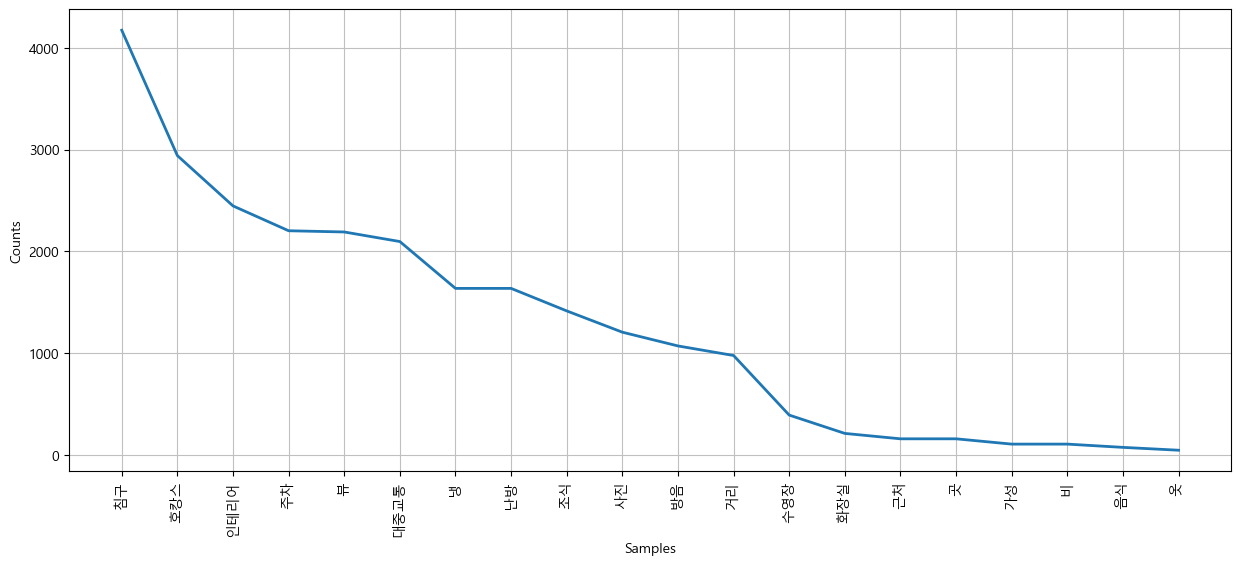

In [16]:
gift = nltk.Text(tokens, name = '네이버 크롤링')
plt.figure(figsize=(15,6))
gift.plot(20)
plt.show()

In [17]:
print(gift)

<Text: 네이버 크롤링>


별점 높은 순: 별점 상위 50개 \
별점 낮은 순: 별점 하위 50개

In [18]:
print(naver_df.shape)
naver_df_score = naver_df[ (pd.notna(naver_df['별점'])) & (pd.notna(naver_df['네이버 이런점이 좋아요 {항목:좋아요수}'])) ]
naver_df_score.shape

(5438, 31)


(151, 31)

In [19]:
sort_naver_df_score = naver_df_score.sort_values(by=['별점'], ascending=False)
sort_naver_df_score['별점'].min()

3.07

In [33]:
print(sort_naver_df_score['별점'][0:50].max())
print(sort_naver_df_score['별점'][0:50].min())
print(sort_naver_df_score['별점'][-50:-1].max())
print(sort_naver_df_score['별점'][-50:-1].min())

5.0
4.42
4.2
3.29


In [ ]:
top50 = sort_naver_df_score.iloc[0:50]
bottom50 = sort_naver_df_score.iloc[-50:-1]
bottom50.tail(5)

In [21]:
def df_to_token_for_nltkText(df):

    #한글 형태소 분석기
    from konlpy.tag import Okt, Kkma, Komoran
    import re
    okt = Okt()

    # df to list
    text_array = df[pd.notna(df['네이버 이런점이 좋아요 {항목:좋아요수}'])]['네이버 이런점이 좋아요 {항목:좋아요수}'].to_list()

    # dic to list
    text_list = []

    #for i in [1]:
    for i in range(len(text_array)):
        line_split = text_array[i].split(",")
        # print(line_split)
        # print(len(line_split))

        for li in line_split:
            
            ele_text = li.replace("{","").replace("}","").split(":")[0]
            ele_count = int(li.replace("{","").replace("}","").split(":")[1])
            # print(li)
            # print(i, ele_text, ele_count)
            text_append = (ele_text+" ")*ele_count
            #text_append = (ele_text+",")*ele_count
            # print(text_append)
            text_list.append(text_append)


        # print(f'------------{i} 끝')

    # print(text_list)
    # len(text_list)

    ## 저장
    ## text = '\n'.join(answer)
    ##text = ','.join(answer)
    ## print(text)

    with open('../DAOU/text_out.txt', 'w', encoding='utf-8') as fp:
       for answer in text_list:
           fp.write(answer + '\n')


    with open('../DAOU/text_out.txt', encoding='utf-8') as file:
       text = file.read()

    #명사 추출
    tokens = okt.nouns(text)
    tokens = [re.sub('[^가-힣]', '', token) for token in tokens]

        
    return tokens
    #return text

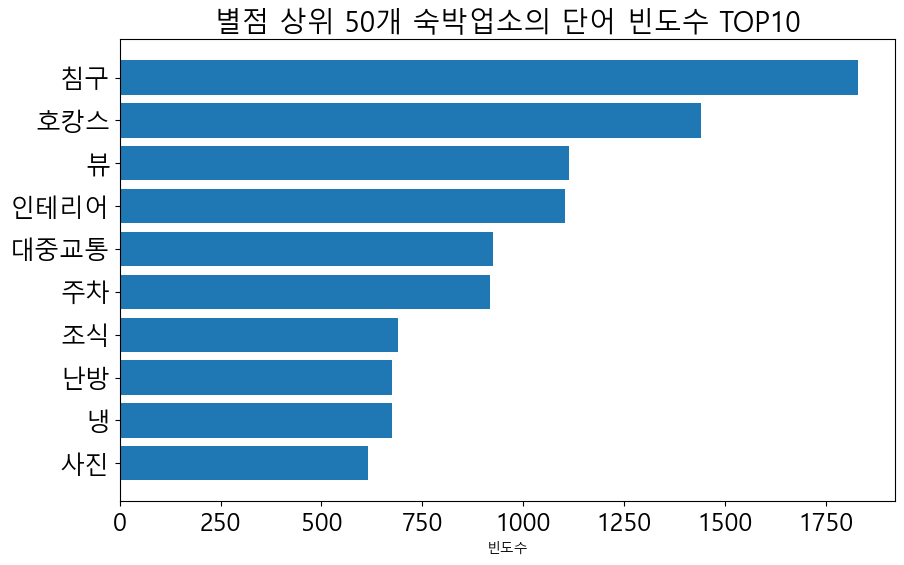

In [29]:
tokens_top50 = df_to_token_for_nltkText(top50)

#print(tokens_top50)
#print(tokens_top50)
# 단어 빈도수 계산
word_counts_top50 = Counter(tokens_top50)
#print(word_counts_top50)

# 가장 빈도수가 높은 상위 10개 단어 추출
words_top50 = word_counts_top50.most_common(10)

# 단어와 빈도수를 별도의 리스트로 분리
words_top50, counts_top50 = zip(*words_top50)

# 단어와 빈도수를 기준으로 내림차순 정렬
words_sorted_top50, counts_sorted_top50 = zip(*sorted(zip(words_top50, counts_top50), key=lambda x: x[1], reverse=False))

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.barh(words_sorted_top50, counts_sorted_top50)
plt.xlabel('빈도수')
plt.ylabel('')
plt.title('별점 상위 50개 숙박업소의 단어 빈도수 TOP10', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
#plt.xlabel('xlabel', fontsize=18)
#plt.ylabel('ylabel', fontsize=16)

plt.show()

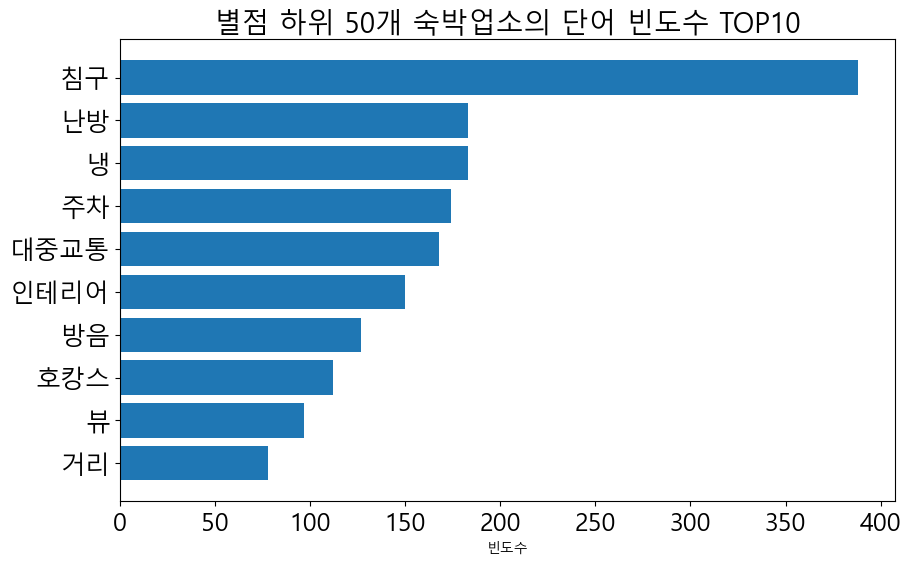

In [31]:
tokens_bottom50 = df_to_token_for_nltkText(bottom50)

# 단어 빈도수 계산
word_counts_bottom50 = Counter(tokens_bottom50)
#print(word_counts_top50)

# 가장 빈도수가 높은 상위 10개 단어 추출
words_bottom50 = word_counts_bottom50.most_common(10)

# 단어와 빈도수를 별도의 리스트로 분리
words_bottom50, counts_bottom50 = zip(*words_bottom50)

# 단어와 빈도수를 기준으로 내림차순 정렬
words_sorted_bottom50, counts_sorted_bottom50 = zip(*sorted(zip(words_bottom50, counts_bottom50), key=lambda x: x[1], reverse=False))

# 바차트 그리기
plt.figure(figsize=(10, 6))
plt.barh(words_sorted_bottom50, counts_sorted_bottom50)
plt.xlabel('빈도수')
plt.ylabel('')
plt.title('별점 하위 50개 숙박업소의 단어 빈도수 TOP10', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.show()